# Heave Compensation Example Script

This script demonstrates the use of boolean operators to plot heave corrected data.  It also provides an example of using the ProcessedData.view() method to plot a subset of the data.

## Setup

In [6]:
# -*- coding: utf-8 -*-

%matplotlib nbagg
%matplotlib

from matplotlib.pyplot import figure, show, subplots_adjust
from echolab2.instruments import EK60
from echolab2.plotting.matplotlib import echogram

Using matplotlib backend: nbAgg


## Read in the data

In [7]:
# Specify some raw files that have heave data and transducer depth in the raw
# data.
rawfiles = ['./data/EK60/DY1706_EK60-D20170625-T061707.raw',
            './data/EK60/DY1706_EK60-D20170625-T062521.raw']


# Create an instance of the EK60 instrument and read the data.
ek60 = EK60.EK60()
ek60.read_raw(rawfiles)

## Parse the data

In [8]:
# Get the 38 kHz raw data.
raw_data_38 = ek60.get_raw_data(channel_number=2)

# Get a ProcessedData object containing the heave corrected Sv on a depth grid.
heave_corrected_Sv = raw_data_38.get_Sv(heave_correct=True)
print(heave_corrected_Sv)

# Extract a portion of the data to plot "zoomed in".  We can use the view method
# to return a ProcessedData object with data attributes that are views into
# our heave_corrected_Sv data attributes.
#
# The view method takes 2 arguments, which are themselves tuples that define the
# start, stop, stride of the ping axes and sample axes, to view the first 100
# pings and first 100 samples of the data.
subset_Sv = heave_corrected_Sv.view((0, 100, 1), (0, 100, 1))
print(subset_Sv)

<class 'echolab2.processing.processed_data.ProcessedData'> at 0x7fcc5b201ac8
                channel(s): [GPT  38 kHz 009072033fa2 2-1 ES38B]
                 frequency: 38000.0
           data start time: 2017-06-25T06:17:07.390
             data end time: 2017-06-25T06:33:34.346
            number of pings: 984
            data attributes: ping_time (984)
                            data (984,5309)
                            depth (5309)

<class 'echolab2.processing.processed_data.ProcessedData'> at 0x7fcc5b201e10
                channel(s): [GPT  38 kHz 009072033fa2 2-1 ES38B]
                 frequency: 38000.0
           data start time: 2017-06-25T06:17:07.390
             data end time: 2017-06-25T06:18:46.692
            number of pings: 100
            data attributes: ping_time (100)
                            data (100,100)
                            depth (100)



/data/vmartine/projects/PyEcholab2/echolab2/processing/processed_data.py:610: RuntimeWarning: invalid value encountered in log10
  self.data[:] = 10.0 * np.log10(self.data)


## Plot the data

<IPython.core.display.Javascript object>


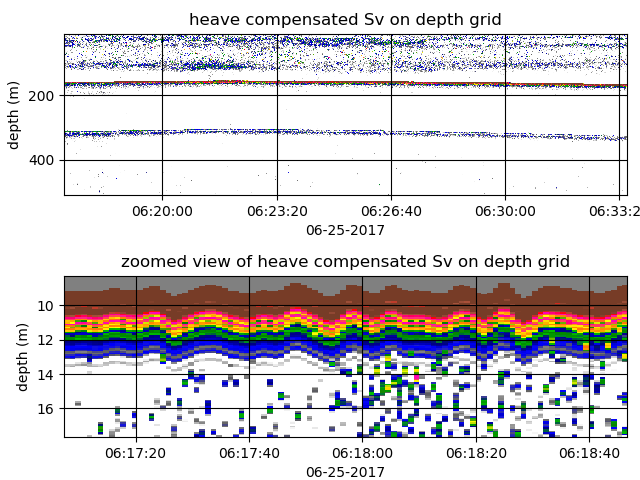

In [9]:
# Create a matplotlib figure to plot our echograms on.
fig = figure()

# Get some properties for the sub plot layout.
subplots_adjust(left=0.1, bottom=0.09, right=0.98, top=.93, wspace=None,
                hspace=0.5)

# Create an axis.
ax_1 = fig.add_subplot(2, 1, 1)
# Create an echogram which will display on our heave corrected data.
echogram_1 = echogram.Echogram(ax_1, heave_corrected_Sv, threshold=[-70, -34])
ax_1.set_title("heave compensated Sv on depth grid")

# Create another axis.
ax_2 = fig.add_subplot(2, 1, 2)
# Create an echogram which will display the Sv data on a range grid.
echogram_2 = echogram.Echogram(ax_2, subset_Sv, threshold=[-70, -34])
ax_2.set_title("zoomed view of heave compensated Sv on depth grid")


# Display our figure.
show()